In [1]:
from google.colab import drive
drive.mount('/content/grive')

Mounted at /content/grive


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pickle

import os
from sklearn.model_selection import train_test_split
import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [3]:
data_df=pd.read_csv('/content/grive/MyDrive/Dataset for ML and DL/heart.csv')
data_df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


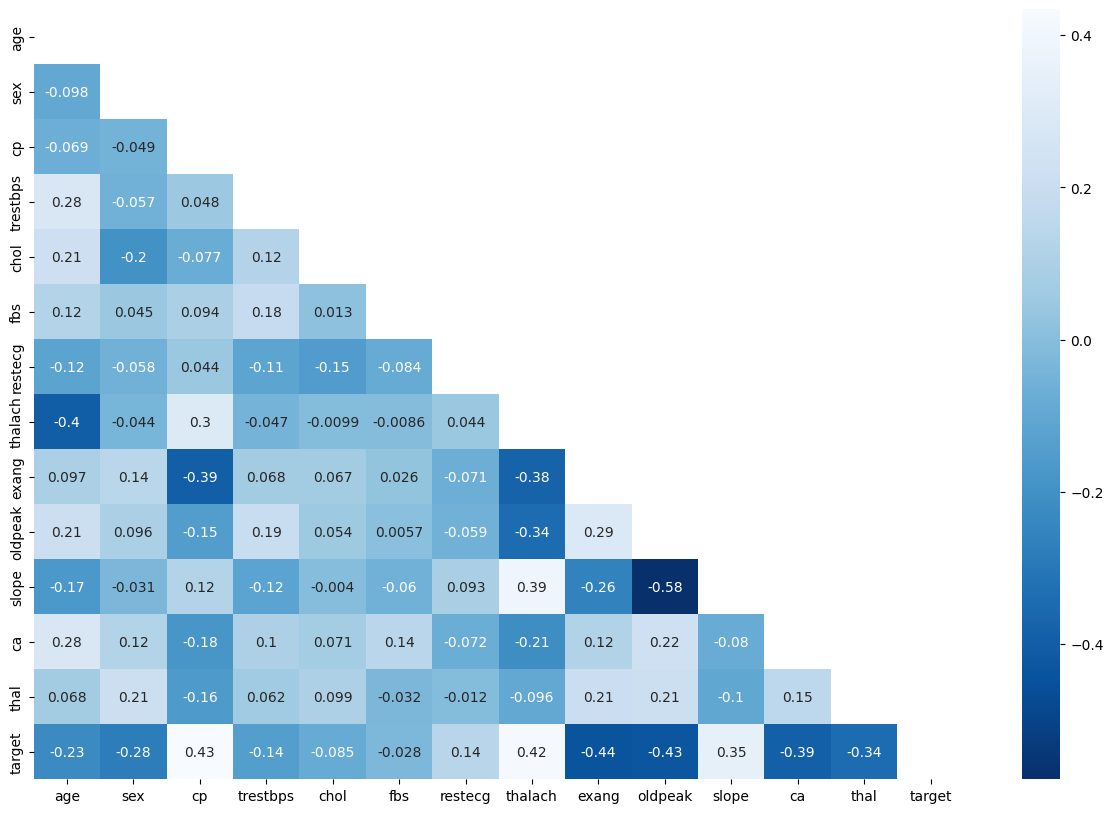

In [4]:
#Building a heatmap using correlation
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
mask=np.triu(data_df.corr())
sns.heatmap(data_df.corr(),mask=mask,annot=True,cmap='Blues_r')
plt.show()

In [5]:
x = data_df.drop(['cp','fbs','exang','ca','target'],axis=1)
y = data_df['target']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=5)
print('Training data : {},{} '.format(x_train.shape, y_train.shape))
print('Testing data : {},{} '.format(x_test.shape, y_test.shape))


Training data : (242, 9),(242,) 
Testing data : (61, 9),(61,) 


In [6]:
x.head(5)

,age,sex,trestbps,chol,restecg,thalach,oldpeak,slope,thal
0,63,1,145,233,0,150,2.3,0,1
1,37,1,130,250,1,187,3.5,0,2
2,41,0,130,204,0,172,1.4,2,2
3,56,1,120,236,1,178,0.8,2,2
4,57,0,120,354,1,163,0.6,2,2


In [7]:
y.head(300)

0      1
1      1
2      1
3      1
4      1
      ..
295    0
296    0
297    0
298    0
299    0
Name: target, Length: 300, dtype: int64

In [8]:
a=x.iloc[6]
a=np.array(a)
a

array([ 56. ,   0. , 140. , 294. ,   0. , 153. ,   1.3,   1. ,   2. ])

In [9]:
score=[]

In [10]:
clf1=LogisticRegression()
clf1.fit(x_train,y_train)
pred1=clf1.predict(x_test)
print(clf1.coef_)
wt1=clf1.coef_
s1=accuracy_score(y_test,pred1)
score.append(s1*100)
print(s1)

[[ 0.00197488 -1.47206846 -0.01423471 -0.00557464  0.33168213  0.0415825
  -0.42345251  0.26649429 -0.83457224]]
0.819672131147541


In [11]:
clf1.intercept_

array([-0.05200499])

In [12]:
df=pd.read_csv('/content/grive/MyDrive/Dataset for ML and DL/Capstone/diabetes_data.csv')
df.head(5)

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
data=df.drop(['Age','Sex','CholCheck','Fruits','Veggies','HvyAlcoholConsump','MentHlth','HeartDiseaseorAttack'],axis=1)
data.head()

,HighChol,BMI,Smoker,PhysActivity,GenHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,0.0,26.0,0.0,1.0,3.0,30.0,0.0,0.0,1.0,0.0
1,1.0,26.0,1.0,0.0,3.0,0.0,0.0,1.0,1.0,0.0
2,0.0,26.0,0.0,1.0,1.0,10.0,0.0,0.0,0.0,0.0
3,1.0,28.0,1.0,1.0,3.0,3.0,0.0,0.0,1.0,0.0
4,0.0,29.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0


In [14]:
x1=data.drop('Stroke',axis=1)
y1=data['Stroke']

In [15]:
x1.head(5)

,HighChol,BMI,Smoker,PhysActivity,GenHlth,PhysHlth,DiffWalk,HighBP,Diabetes
0,0.0,26.0,0.0,1.0,3.0,30.0,0.0,1.0,0.0
1,1.0,26.0,1.0,0.0,3.0,0.0,0.0,1.0,0.0
2,0.0,26.0,0.0,1.0,1.0,10.0,0.0,0.0,0.0
3,1.0,28.0,1.0,1.0,3.0,3.0,0.0,1.0,0.0
4,0.0,29.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0


In [16]:
y1.head(1800)

0       0.0
1       1.0
2       0.0
3       0.0
4       0.0
       ... 
1795    0.0
1796    0.0
1797    0.0
1798    0.0
1799    1.0
Name: Stroke, Length: 1800, dtype: float64

In [17]:
b=x1.iloc[0]
b=np.array(b)
b

array([ 0., 26.,  0.,  1.,  3., 30.,  0.,  1.,  0.])

In [18]:
b.size

9

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x1,y1,test_size=0.2, random_state=5)
score=[]

In [20]:
clf2=LogisticRegression()
clf2.fit(x_train,y_train)
pred1=clf2.predict(x_test)
print(clf2.coef_)
wt2=clf2.coef_
s1=accuracy_score(y_test,pred1)
score.append(s1*100)
print(s1)

[[ 0.34991585 -0.03290906  0.2083866  -0.09671925  0.34115311  0.00606694
   0.82711281  0.69315589  0.43163021]]
0.9367706344154466


In [21]:
wt2.size

9

In [22]:
clf2.intercept_

array([-4.21747379])

In [23]:
c=[1,2,3,4,5]
d=[3,1,2,5,6]
c=np.array(c)
d=np.array(d)

t=c*d
r=t.sum()
print(t)
print(r)

[ 3  2  6 20 30]
61


In [24]:
q1=a*wt1
q1
h1=q1.sum()
h1=h1-0.05
h1

0.8377726058367663

In [25]:
z1 = 1/(1 + np.exp(-h1))
z1

0.6979958937727856

In [26]:
q2=b*wt2
q2
h2=q2.sum()
h2=h2-4.2
h2

-3.2537314877260197

In [27]:
z2 = 1/(1 + np.exp(-h2))
z2

0.03719303284064647

In [29]:
if z1> 0.5 and z2> 0.5:
  print("Priority A")

elif z1>0.5 or z2>0.5:
  print("Priority B")

else:
  print("Safe")

Priority B
